# Computer Vision - P3
# First part


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 26th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

First part: Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

Second part: Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background subtraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)


Note: One of the applications of the backgroun subtraction methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras. Today, most of videoconference tools allow to put a virtual background. Thus, they need to extract the person (the foreground) and to put it on the new virtual background.


## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

Hint: In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html).

Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [1]:
%matplotlib inline

In [2]:
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')

<IPython.core.display.Javascript object>


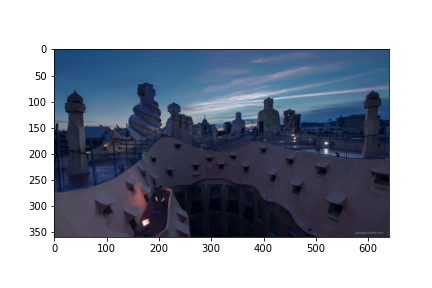

In [3]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=50, repeat= False)
plt.show()

a) Each of the scenes in a video is usually called 'shot'. Find where a shot (scene) finishes and the following starts (the shot boundaries). 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

In [4]:
# Your solution here
# 64-32 bins

from skimage.exposure import histogram
from skimage import img_as_float
import numpy as np
from skimage.color import rgba2rgb, rgb2gray


"""
Image must be rgb or rgba
"""
def image_histogram(image, numberOfBins):
    #Transform to rgb
    if(image.shape[2]==4):
        image_gray=rgb2gray(rgba2rgb(image))
    else:
        image_gray=rgb2gray(image)
    
    hst_r, bins_r = histogram( img_as_float(image[:,:,0]), nbins=numberOfBins)
    hst_g, bins_g = histogram( img_as_float(image[:,:,1]), nbins=numberOfBins)
    hst_b, bins_b = histogram( img_as_float(image[:,:,2]), nbins=numberOfBins)
    hst_gy, bins_gy = histogram( img_as_float(image_gray[:,:]), nbins=numberOfBins)
    
    ind = np.arange(numberOfBins)
    
    return np.array([hst_r, hst_g, hst_g])

In [36]:
NUM_BINS = 16
DISTANCE_THRESHOLD = 100000

In [6]:
def distance(i):
    last_hist = image_histogram(ic[i-1], NUM_BINS)
    current_hist = image_histogram(ic[i], NUM_BINS)
    return np.linalg.norm(last_hist - current_hist)

Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

<IPython.core.display.Javascript object>


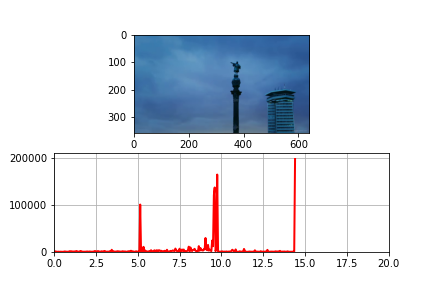

In [35]:
# Example A
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = distance(cnt)
        # adapted the data generator to yield both sin and cos
        yield t, y


data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, DISTANCE_THRESHOLD * 1.5)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

In case you used histograms to separate shots, use different bins to see what is the optimal size of the histogram to better separate the shots.

In [37]:
shot_end = []
shot_start = []
for i in range(len(ic)):
    dist = distance(i)
    if (dist > DISTANCE_THRESHOLD):
        shot_start.append(ic[i])
        shot_end.append(ic[i-1]) #Aqui el primer element sera el final de l'ultima escena, de moment chapuza 

b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


**Hint:**
Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize the initial and final frames.


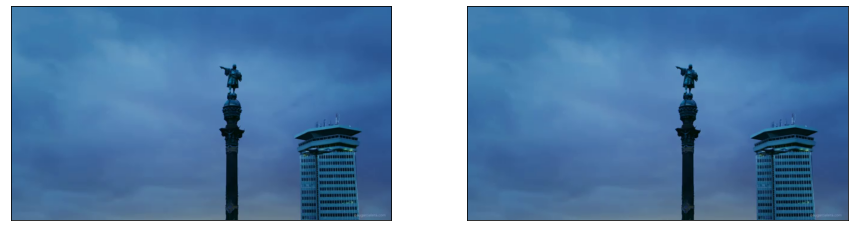

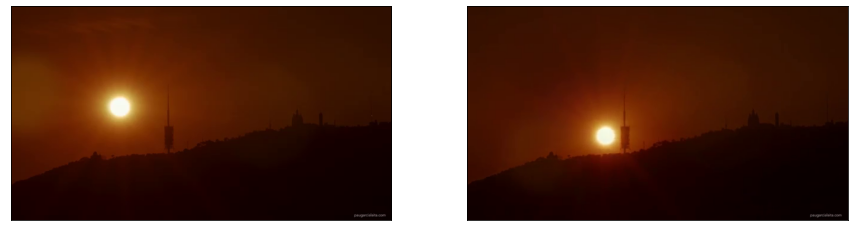

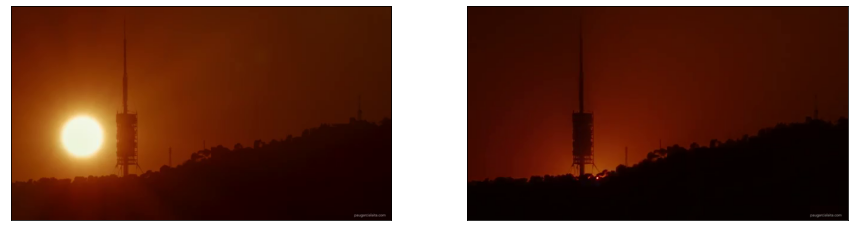

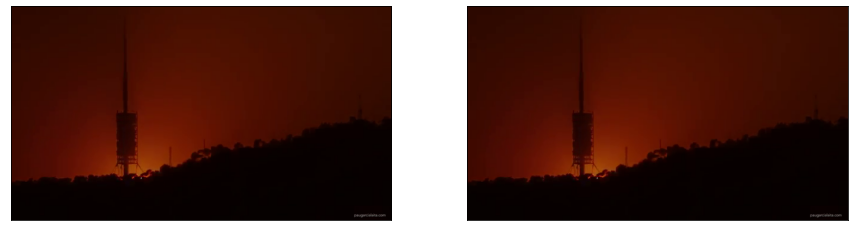

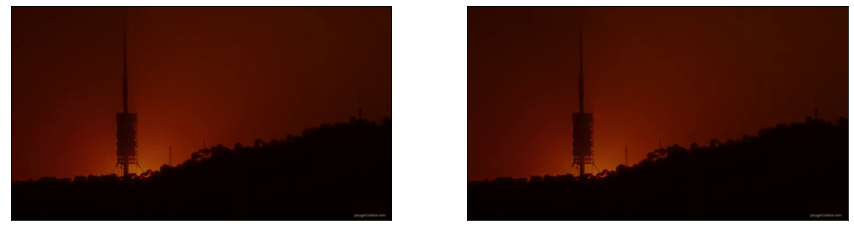

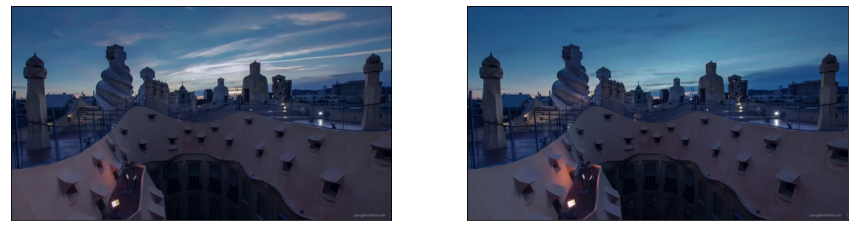

In [40]:
%matplotlib inline

for i in range(len(shot_end)):
    visualize2(shot_start[i-1], shot_end[i], "", "") 
    #Faig el -1 per cubrir el que comento del final de la ultima escena

c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [17]:
# I used euclidean distance between histograms of each frame and the previous

d) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [18]:
# Your solution here

e) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [19]:
# Your solution here

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

a) Visualize the following images for each different scene (there are 3) of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [20]:
# Your solution here

b) What do the static background images represent? 

In [21]:
# Your solution here

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [22]:
# Your solution here

d) What happens if you subtract the background image from the original one?

In [23]:
# Your solution here

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [24]:
# Your solution here

f) **[OPTIONAL]**
- Apply the algorithm to some other video that you found.

In [25]:
# Your solution here